In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
import cvxpy
import pulp
np.random.seed(42)

# 学校配置問題

In [18]:
a = np.random.randn(5,2)

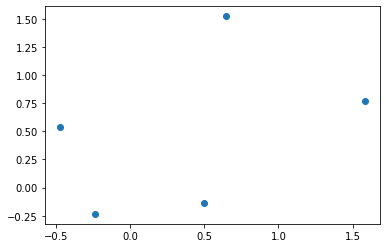

In [19]:
plt.scatter(a[:,0],a[:,1]) #各家の配置

## 目的関数1
$$
\min _{\boldsymbol{x} \in \mathbb{R}^{2}} \frac{1}{5} \sum_{i=1}^{5}\left\|\boldsymbol{a}_{i}-\boldsymbol{x}\right\|^{2} \quad
$$

[0.40399755 0.49212467]


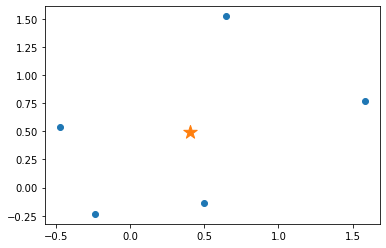

In [20]:
x = cvxpy.Variable(2)
objective = sum(cvxpy.sum_squares(a[i] - x) for i in range(len(a)))
prob = cvxpy.Problem(cvxpy.Minimize(objective))
prob.solve()
print(x.value)
plt.scatter(a[:,0],a[:,1])
plt.scatter(x[0].value, x[1].value, marker = '*', s = 200)

## 目的関数2
$$
\min _{\boldsymbol{x} \in \mathbb{R}^{2}} \frac{1}{5} \sum_{i=1}^{5}\left\|\boldsymbol{a}_{i}-\boldsymbol{x}\right\| \quad
$$

[0.28837677 0.29541787]


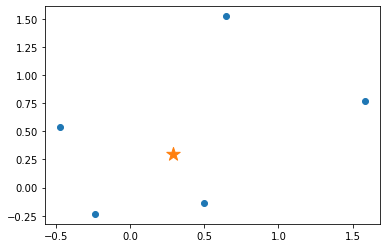

In [21]:
x = cvxpy.Variable(2)
objective = sum(cvxpy.norm(a[i] - x,p=2) for i in range(len(a)))
prob = cvxpy.Problem(cvxpy.Minimize(objective))
prob.solve()
print(x.value)
plt.scatter(a[:,0],a[:,1])
plt.scatter(x[0].value, x[1].value, marker = '*', s = 200)

## 目的関数3
$$
\min _{\boldsymbol{x} \in \mathbb{R}^{2}} \max _{i=1, \ldots, 5}\left\|\boldsymbol{a}_{i}-\boldsymbol{x}\right\| \quad
$$
これは以下の問題に定式化しなおせる
$$
\begin{array}{c, c, c}
\min  && t &&\\ 
s.t. && \left\|\boldsymbol{a}_{i}-\boldsymbol{x}\right\|  \le t&& i = 1,...,5\\
\end{array}
$$

[0.56245369 0.46594381]


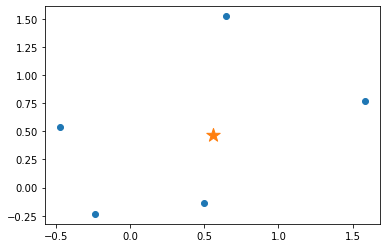

In [22]:
x = cvxpy.Variable(2)
t = cvxpy.Variable(1)
objective = t
constraints = list(cvxpy.norm(a[i] - x,p=2) <= t for i in range(len(a)))
prob = cvxpy.Problem(cvxpy.Minimize(objective), constraints)
prob.solve()
print(x.value)
plt.scatter(a[:,0],a[:,1])
plt.scatter(x[0].value, x[1].value, marker = '*', s = 200)

## 目的関数4
$$
\min _{x \in \mathbb{R}^{2}} \frac{1}{5} \sum_{i=1}^{5}\left\|a_{i}-x\right\|_{1}
$$

[0.49671416 0.54256004]


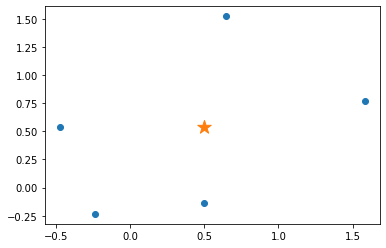

In [23]:
x = cvxpy.Variable(2)
objective = sum(cvxpy.norm(a[i] - x,p=1) for i in range(len(a)))
prob = cvxpy.Problem(cvxpy.Minimize(objective))
prob.solve()
print(x.value)
plt.scatter(a[:,0],a[:,1])
plt.scatter(x[0].value, x[1].value, marker = '*', s = 200)

# 輸送計画
$$
\begin{aligned}
\min . \sum_{i=1}^{m} \sum_{j=1}^{n} c_{i j} x_{i j} \\
\sum_{j=1}^{n} x_{i j} \leq a_{i} \\
\sum_{i=1}^{m} x_{i j}=b_{j} \\
x_{i j} \geq 0
\end{aligned}
$$
具体的なインスタンスとして[NTTデータ数理](https://www.msi.co.jp/nuopt/docs/v19/examples/html/02-02-00.html)を参考にする

In [24]:
c = np.array([[3.4,2.2,2.9],[3.4,2.4,2.5]])
a = np.array([250,450])
b = np.array([200,200,200])

In [25]:
x = cvxpy.Variable((2,3))
objective = cvxpy.sum(cvxpy.multiply(c,x))
constraints = []
constraints += list(cvxpy.sum(x[i,:]) <= a[i] for i in range(len(a)))
constraints += list(cvxpy.sum(x[:,i]) == b[i] for i in range(len(b)))
constraints += [x >= 0]
prob = cvxpy.Problem(cvxpy.Minimize(objective), constraints)
prob.solve()

1620.0000001496592

In [26]:
opt_sol = x.value
for i in range(len(a)):
    for j in range(len(b)):
        print("生産地{}から消費地{}への輸送量 : {}".format(i,j,opt_sol[i][j]))

生産地0から消費地0への輸送量 : 36.3178119330551
生産地0から消費地1への輸送量 : 199.99999963881064
生産地0から消費地2への輸送量 : 1.9355049614523008e-07
生産地1から消費地0への輸送量 : 163.682188066945
生産地1から消費地1への輸送量 : 3.6118959789626185e-07
生産地1から消費地2への輸送量 : 199.99999980644955
